### Filtros

Found 7624 images belonging to 5 classes.


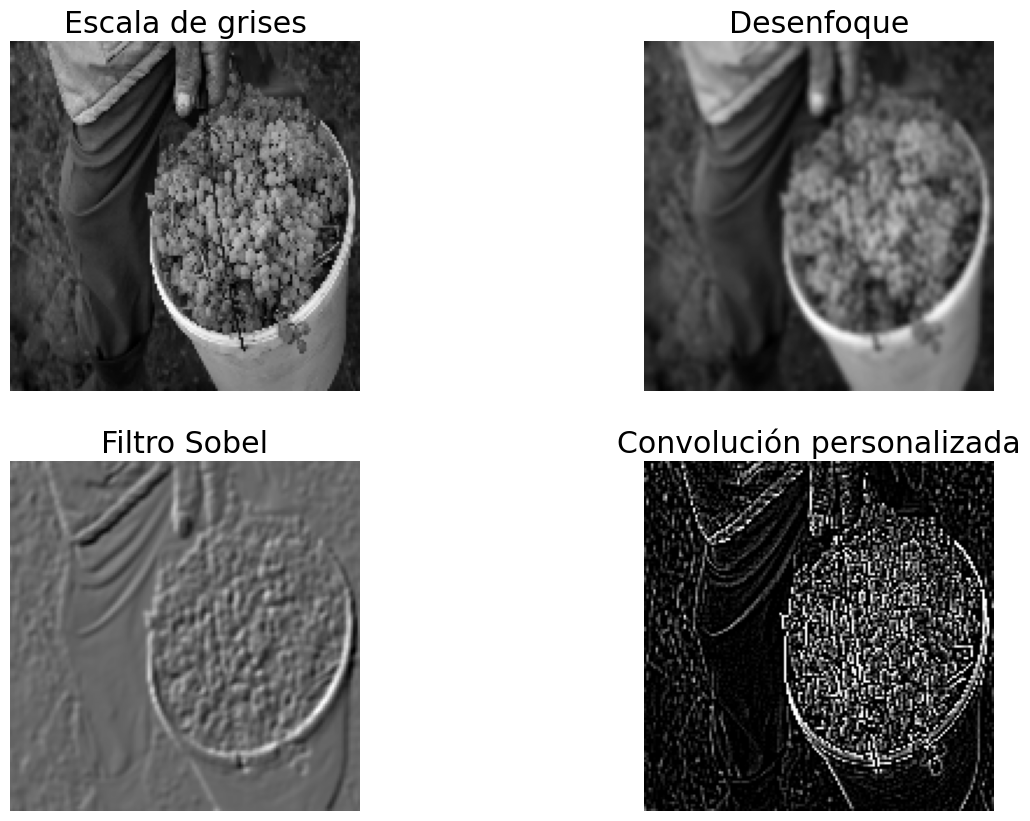

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Generador para normalizar la cargar de imágenes de frutas
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Diplomado en ciencia de datos/Fruits',
    target_size=(150, 150), # Redimensión de las imágenes
    batch_size=32,
    class_mode='categorical'  # Multiclase porque hay más de 2 clases
)

def apply_filters_and_convolutions(image):

    # Reconvertimos 225 para OpenCV
    image = (image * 255).astype(np.uint8)
     # Convierte la imagen a escala de grises
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # Aplicar un desenfoque gaussiano(reduce ruido y detalles)
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    #Detectar los bordes en la imagen con el filtro Sobel (gradiente en X y Y)
    sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
    sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)
    sobel_combined = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

    # Aplicar un filtro de detección de bordes personalizado
    kernel = np.array([[-1, -1, -1],
                      [-1,  8, -1],
                      [-1, -1, -1]])
    custom_convolution = cv2.filter2D(gray_image, -1, kernel)

    return gray_image, blurred_image, sobel_combined, custom_convolution

def display_images(images, titles):
    plt.figure(figsize=(15, 10))
    for i in range(len(images)):
        plt.subplot(2, 2, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Se toma el primer lote de imagenes del generador
images, labels = next(train_generator)

# Aplicamos los filtros a la primera imagen del batch
gray, blur, sobel, conv = apply_filters_and_convolutions(images[0])

# Mostramos las transformaciones
display_images(
    [gray, blur, sobel, conv],
    ['Escala de grises', 'Desenfoque', 'Filtro Sobel', 'Convolución personalizada']
)

Los filtros utilizados fueron:

Escala de grises: Elimina la información de color, dejando solo la intensidad de la luz.

Desenfoque gaussiano: Reduce el ruido y los detalles de la imagen.

Filtro Sobel: Calcula el gradiente de la imagen, lo que destaca los bordes de los objetos.

Convolución personalizada: Ayuda en la detección de bordes de la imagen.


### Redimensionar las imagenes y mostrar en un mosaico una de cada clase

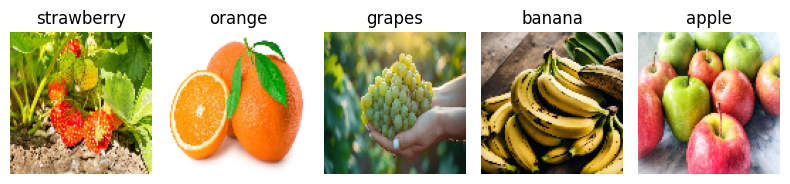

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

# Parámetros de visualización
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 10})

dataset_path = '/content/drive/MyDrive/Diplomado en ciencia de datos/Fruits'

# Nombres de las frutas
fruit_names = ['strawberry', 'orange', 'grapes', 'banana', 'apple']

# Tamaño de las imágenes
img_size = (100, 100)

# Crear una lista para almacenar las imágenes
images = []

# Cargar una imagen de cada fruta
for fruit in fruit_names:
    fruit_path = os.path.join(dataset_path, fruit)
    img_files = os.listdir(fruit_path)
    img_path = os.path.join(fruit_path, img_files[0])  # Seleccionamos la primera imagen
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB
    img_resized = cv2.resize(img, img_size)  # Redimensionar la imagen
    images.append(img_resized)

# Mostrar las imágenes una al lado de otra
num_images = len(images)
fig, axes = plt.subplots(1, num_images)

# Si hay solo una imagen, axes no es una lista
if num_images == 1:
    axes = [axes]

for ax, img, label in zip(axes, images, fruit_names):
    ax.imshow(img)
    ax.set_title(label)
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

dataset_path = '/content/drive/MyDrive/Diplomado en ciencia de datos/Fruits'

# Obtener nombres de carpetas (frutas)
fruit_folders = sorted(os.listdir(dataset_path))

# Tamaño deseado para las imágenes
img_h, img_w = 100, 100  # altura (n), ancho (m)

for fruit in fruit_folders:
    fruit_path = os.path.join(dataset_path, fruit)
    image_files = os.listdir(fruit_path)[:64]  # máximo 64 imágenes

    # Matriz donde se colocaran las imagenes
    allFrutas = np.zeros((img_h * 8, img_w * 8, 3), dtype=np.uint8)

    count = 0
    for j in range(8):
        for k in range(8):
            if count < len(image_files):
                img_path = os.path.join(fruit_path, image_files[count])
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #convierte a RGB
                img = cv2.resize(img, (img_w, img_h)) # Redimensiona
                allFrutas[j*img_h:(j+1)*img_h, k*img_w:(k+1)*img_w] = img
                count += 1

    plt.imshow(allFrutas)
    plt.axis('off')
    plt.title(fruit)
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

dataset_path = '/content/drive/MyDrive/Diplomado en ciencia de datos/Fruits'

# Obtener nombres de carpetas (frutas)
fruit_folders = sorted(os.listdir(dataset_path))

# Tamaño deseado para las imágenes
img_h, img_w = 100, 100  # altura (n), ancho (m)

for fruit in fruit_folders:
    fruit_path = os.path.join(dataset_path, fruit)
    image_files = os.listdir(fruit_path)[:64]  # máximo 64 imágenes

    # Crear una imagen para el collage en escala de grises
    allFrutas = np.zeros((img_h * 8, img_w * 8), dtype=np.uint8)

    count = 0
    for j in range(8):
        for k in range(8):
            if count < len(image_files):
                img_path = os.path.join(fruit_path, image_files[count])
                img = cv2.imread(img_path)
                # Convertir la imagen a escala de grises
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img = cv2.resize(img, (img_w, img_h))
                allFrutas[j*img_h:(j+1)*img_h, k*img_w:(k+1)*img_w] = img
                count += 1

    # Mostrar el collage en escala de grises
    # El parámetro cmap='gray' es para que la imagen se vea en escala de grises
    plt.imshow(allFrutas, cmap='gray')
    plt.axis('off')
    plt.title(fruit)
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

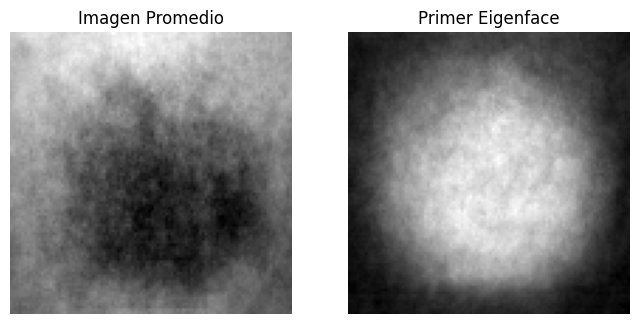

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2


dataset_path = '/content/drive/MyDrive/Diplomado en ciencia de datos/Fruits'

fruit_folders = sorted(os.listdir(dataset_path))

# Tamaño deseado para las imágenes
img_h, img_w = 100, 100  # altura (n), ancho (m)

# Crear un arreglo para almacenar las imágenes de frutas en formato vectorizado
frutas = []

# Leer las imágenes de las frutas y convertirlas en vectores
for fruit in fruit_folders:
    fruit_path = os.path.join(dataset_path, fruit)
    image_files = os.listdir(fruit_path)[:64]  # máximo 64 imágenes

    for image_file in image_files:
        img_path = os.path.join(fruit_path, image_file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convertir a escala de grises
        img = cv2.resize(img, (img_w, img_h))  # Redimensionar a 100x100

        # Aplanar la imagen (convertirla a un vector)
        frutas.append(img.flatten())

# Convertir la lista de imágenes en un array de NumPy
frutas = np.array(frutas).T  # Transponer para que las columnas sean las imágenes

# Calcular el rostro promedio (promedio de las columnas)
avgFace = np.mean(frutas, axis=1)

# Matriz centrada
X = frutas - np.tile(avgFace, (faces.shape[1], 1)).T

# Realizar la descomposición en valores singulares (SVD)
U, S, VT = np.linalg.svd(X, full_matrices=0)

# Visualizar el rostro promedio y el primer eigenface
fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
ax1.imshow(np.reshape(avgFace, (img_w, img_h)), cmap='gray')
ax1.set_title('Imagen Promedio')
ax1.axis('off')

ax2 = fig1.add_subplot(122)
ax2.imshow(np.reshape(U[:, 0], (img_w, img_h)), cmap='gray')  # Primer eigenface
ax2.set_title('Primer Eigenface')
ax2.axis('off')

plt.show()
